In [1]:
import numpy as np
import matplotlib.pylab as plt
from pandas import read_csv
import matplotlib.pyplot
from pandas import DataFrame
from pandas import Grouper
from pandas import merge
import pandas as pd

In [3]:
data = pd.read_csv("US_counties_COVID19_health_weather_data_reduced.csv")

In [4]:
data.head()

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability,date_stay_at_home_announced,date_stay_at_home_effective
0,1/21/2020,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697306,...,0.8249,0.9472,0.2404,0.7705,0.3473,0.3021,0.5384,0.2961,3/23/2020,3/23/2020
1,1/22/2020,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697306,...,0.8249,0.9472,0.2404,0.7705,0.3473,0.3021,0.5384,0.2961,3/23/2020,3/23/2020
2,1/23/2020,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697306,...,0.8249,0.9472,0.2404,0.7705,0.3473,0.3021,0.5384,0.2961,3/23/2020,3/23/2020
3,1/24/2020,Cook,Illinois,17031,1,0.0,no,no,41.840039,-87.816716,...,0.9631,0.9863,0.0258,0.8491,0.9882,0.4371,0.8742,0.6937,3/20/2020,3/21/2020
4,1/24/2020,Snohomish,Washington,53061,1,0.0,no,no,48.047489,-121.697306,...,0.8249,0.9472,0.2404,0.7705,0.3473,0.3021,0.5384,0.2961,3/23/2020,3/23/2020


In [6]:
data_map = data[pd.to_datetime(data['date'])=="2020-10-31"]

In [9]:
#drop counties that lie outside of the contiguous United States
data_map = data_map[~data_map.state.str.contains("Hawaii")]
data_map = data_map[~data_map.state.str.contains("Alaska")]
data_map = data_map[~data_map.state.str.contains("Puerto Rico")]
data_map = data_map[~data_map.state.str.contains("Northern Mariana Islands")]
data_map = data_map[~data_map.state.str.contains("Virgin Islands")]

In [24]:
data_map['deaths_p'] = (data_map['deaths']/data_map['total_population'])*100000

In [22]:
for col in data_map.columns:
    print(col)

date
county
state
fips
cases
deaths
stay_at_home_announced
stay_at_home_effective
lat
lon
total_population
area_sqmi
population_density_per_sqmi
num_deaths
percent_smokers
percent_adults_with_obesity
food_environment_index
num_uninsured
percent_uninsured
num_primary_care_physicians
primary_care_physicians_rate
num_mental_health_providers
mental_health_provider_rate
preventable_hospitalization_rate
percent_vaccinated
high_school_graduation_rate
num_some_college
population
percent_some_college
num_unemployed_CHR
labor_force
percent_unemployed_CHR
percent_children_in_poverty
eightieth_percentile_income
twentieth_percentile_income
income_ratio
num_single_parent_households_CHR
num_households_CHR
percent_single_parent_households_CHR
num_associations
social_association_rate
annual_average_violent_crimes
violent_crime_rate
severe_housing_cost_burden
overcrowding
inadequate_facilities
percent_drive_alone_to_work
num_workers_who_drive_alone
percent_long_commute_drives_alone
life_expectancy
num_d

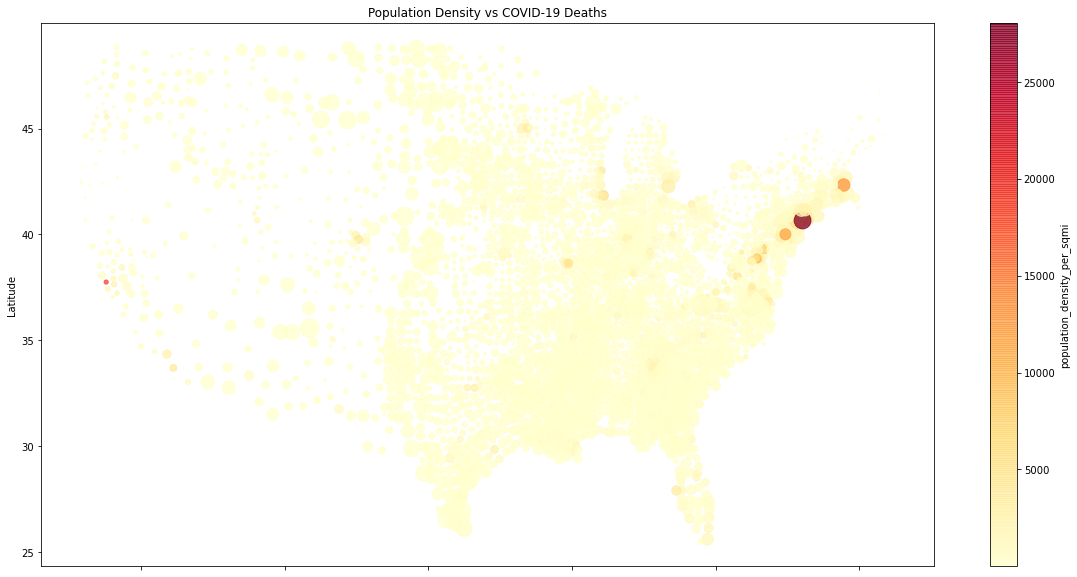

In [25]:
data_map.plot(kind='scatter',x='lon',y='lat',alpha=.75,s='deaths_p',c='population_density_per_sqmi',figsize=(20,10),cmap='YlOrRd')
plt.title('Population Density vs COVID-19 Deaths')
plt.xlabel('Longitutde')
plt.ylabel('Latitude')
plt.show()

In [29]:
data_map = data_map[data_map.population_density_per_sqmi < 10000]

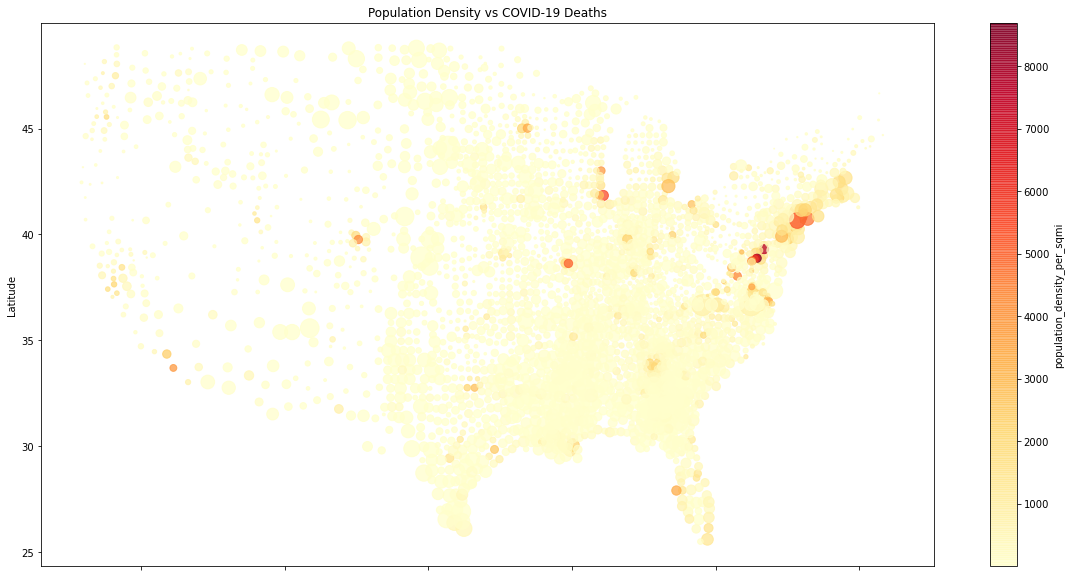

In [31]:
data_map.plot(kind='scatter',x='lon',y='lat',alpha=.75,s='deaths_p',c='population_density_per_sqmi',figsize=(20,10),cmap='YlOrRd')
plt.title('Population Density vs COVID-19 Deaths')
plt.xlabel('Longitutde')
plt.ylabel('Latitude')
plt.show()